# Predict the observed amplitude, A, of $\theta_y$ in simulation.

Define constants

In [1]:
from math import sqrt, radians, atan2, tan, degrees
from IPython.display import Latex
import numpy as np
font_size=14
import matplotlib.pyplot as plt
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu


# Physics
c_light=299792458. # m/s 
mMuon = 105.6583745 # MeV 
aMuon= 11659208.9e-10  
h_bar= 1.054571817e-34 # J/s
MeV_to_kg = 1.79e-30 # MeV -> kg conversion factor 
cm_to_m = 1e-2 # cm -> m conversion factor 


measured_Bz=6.8e-6 # rad 
measured_Bz_e=7.1e-6 # rad 

test = 0.13e-6 

In [2]:
# https://cdcvs.fnal.gov/redmine/projects/gm2geom/repository/revisions/develop/entry/common/Gm2Constants_service.cc
betaGammaMagicSquared = (1.0 / aMuon)
# print("betaGammaMagicSquared", betaGammaMagicSquared)
gammaMagicSquared = (1.0 + betaGammaMagicSquared)
# print("gammaMagicSquared", gammaMagicSquared)
gammaMagic=sqrt(gammaMagicSquared)
print("ɣ"+"={0:.5f}".format(gammaMagic))

# set gamma to gammaMagic
gamma = gammaMagic
gamma_2 = gamma**2

beta= sqrt( 1.0- (1.0/gamma_2) )
print("β"+"={0:.5f}".format(beta))

ɣ=29.30343
β=0.99942


In [3]:
def delta_mrf(amplitude):
    return atan2( ( tan(10*amplitude) ) , ( gammaMagic ) )

In [4]:
print(delta_mrf(0.01e-6))

3.4125695620048315e-09


In [5]:
def bz_ppm(amplitude):
    return tan(10*amplitude) / gammaMagic

In [6]:
print(bz_ppm(10.9e-6)*1e6)

3.7197008373165095


In [21]:
s12=   np.array([6.8,  7.9, -3.5, -0.1])
s12_e= np.array([7.1, 4.5, 5.7, 3.6])
s18=   np.array([-9.5, 10.9, -4.6, 9.8])
s18_e= np.array([7.3, 5.1, 6.0, 4.2])
s1218=(s12+s18)/2
s1218_e=np.sqrt(s12_e**2+s18_e**2)
ds_names=('60h', "9D", "HK", "EG")
ds_colors=["g", "r", "k", "b"]
ds_colors_ex=["orange", "purple", "gray", "cyan"]
ds_markers=["o", "^", "*", "D"]
ds_markers_ex=["P", ".", "x", "h"]

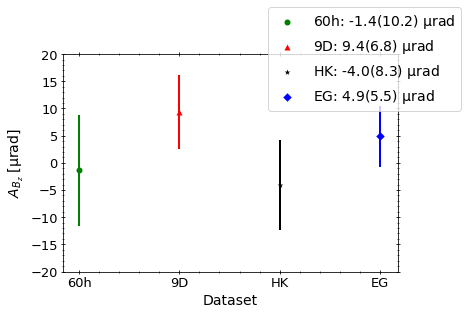

In [22]:
fig, ax = cu.plot_fom(ds_names, s1218, s1218_e, ds_colors, ds_markers)
ax.set_ylim(-20, 20)
fig.savefig("../fig/sum_bz.png", dpi=300, bbox_inches='tight');

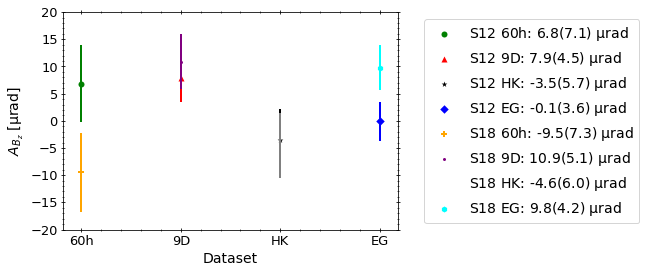

In [23]:
fig, ax = cu.plot_fom(ds_names, s12, s12_e, ds_colors, ds_markers, eL="S12 ")
fig, ax = cu.plot_fom(ds_names, s18, s18_e, ds_colors_ex, ds_markers_ex, fig=fig, ax=ax, eL="S18 ")
ax.set_ylim(-20, 20)
ax.legend(fontsize=font_size, loc='upper center', bbox_to_anchor=(1.4, 1.0));
fig.savefig("../fig/s12S18_sum_bz.png", dpi=300, bbox_inches='tight');

In [10]:
# BNL style
# s1218_ppm = 

In [11]:

# ax.set_ylim(-20, 20)
# fig.savefig("../fig/sum_ppm.png", dpi=300, bbox_inches='tight');